In [ ]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir ='/content/drive/MyDrive/data/train/VNmoney'
val_dir = '/content/drive/MyDrive/data/val/VNmoney'

In [ ]:
batch_size = 120
IMG_SHAPE = 150 
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE)
                                                )

Found 80 images belonging to 10 classes.


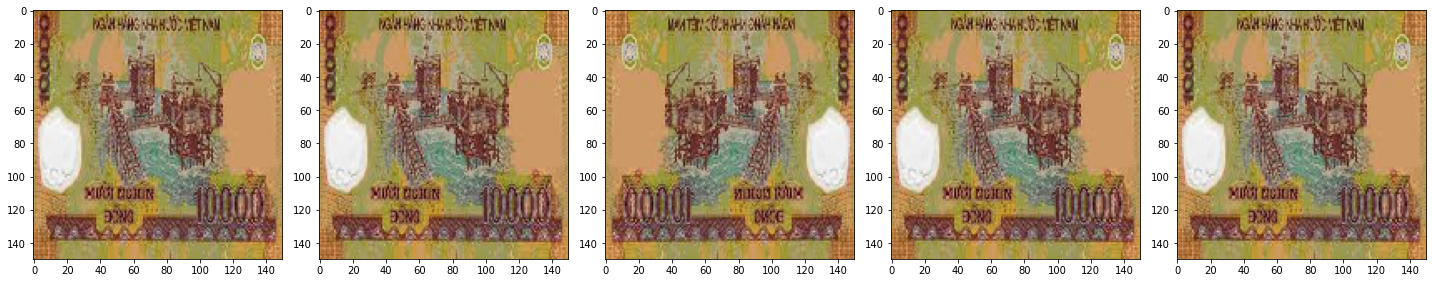

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE)
                                                )

Found 80 images belonging to 10 classes.


In [ ]:
train_data_gen.class_indices

{'100': 0,
 '1000': 1,
 '10000': 2,
 '100000': 3,
 '200': 4,
 '2000': 5,
 '20000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9}

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 80 images belonging to 10 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=30,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
1/1 [==============================] - 14s 14s/step - loss: nan - accuracy: 0.1625 - val_loss: nan - val_accuracy: 0.1625
Epoch 2/30
1/1 [==============================] - 1s 1s/step - loss: nan - accuracy: 0.1625 - val_loss: nan - val_accuracy: 0.1625
Epoch 3/30
1/1 [==============================] - 1s 1s/step - loss: nan - accuracy: 0.1625 - val_loss: nan - val_accuracy: 0.1625
Epoch 4/30
1/1 [==============================] - 1s 1s/step - loss: nan - accuracy: 0.1625 - val_loss: nan - val_accuracy: 0.1625
Epoch 5/30
1/1 [==============================] - 1s 1s/step - loss: nan - accuracy: 0.1625 - val_loss: nan - val_accuracy: 0.1625
Epoch 6/30
1/1 [==============================] - 1s 1s/step - loss: nan - accuracy: 0.1625 - val_loss: nan - val_accuracy: 0.1625
Epoch 7/30
1/1 [==============================] - 1s 1s/step - loss: nan - accuracy: 0.1625 - val_loss: nan - val_accuracy: 0.1625
Epoch 8/30
1/1 [==============================] - 1s 1s/step - loss: nan - accura

In [ ]:
model.save('/content/drive/MyDrive/data/modelsave/final_money.h5')

In [ ]:
score=model.evaluate(val_data_gen,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

1/1 [==============================] - 1s 722ms/step - loss: nan - accuracy: 0.1625
Sai số:  nan
Độ chính xác:  0.16249999403953552


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img,save_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

kết quả dự đoán :  100


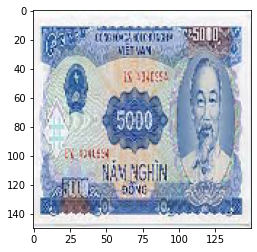

In [ ]:
img = load_img('/content/5k.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['100','1000','10000','100000','200','2000','20000','500','5000','50000']
print('kết quả dự đoán : ',Label[int(np.argmax(model.predict(img),axis=-1))])

100': 0,
 '1000': 1,
 '10000': 2,
 '100000': 3,
 '200': 4,
 '2000': 5,
 '20000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9}